<IPython.core.display.Javascript object>


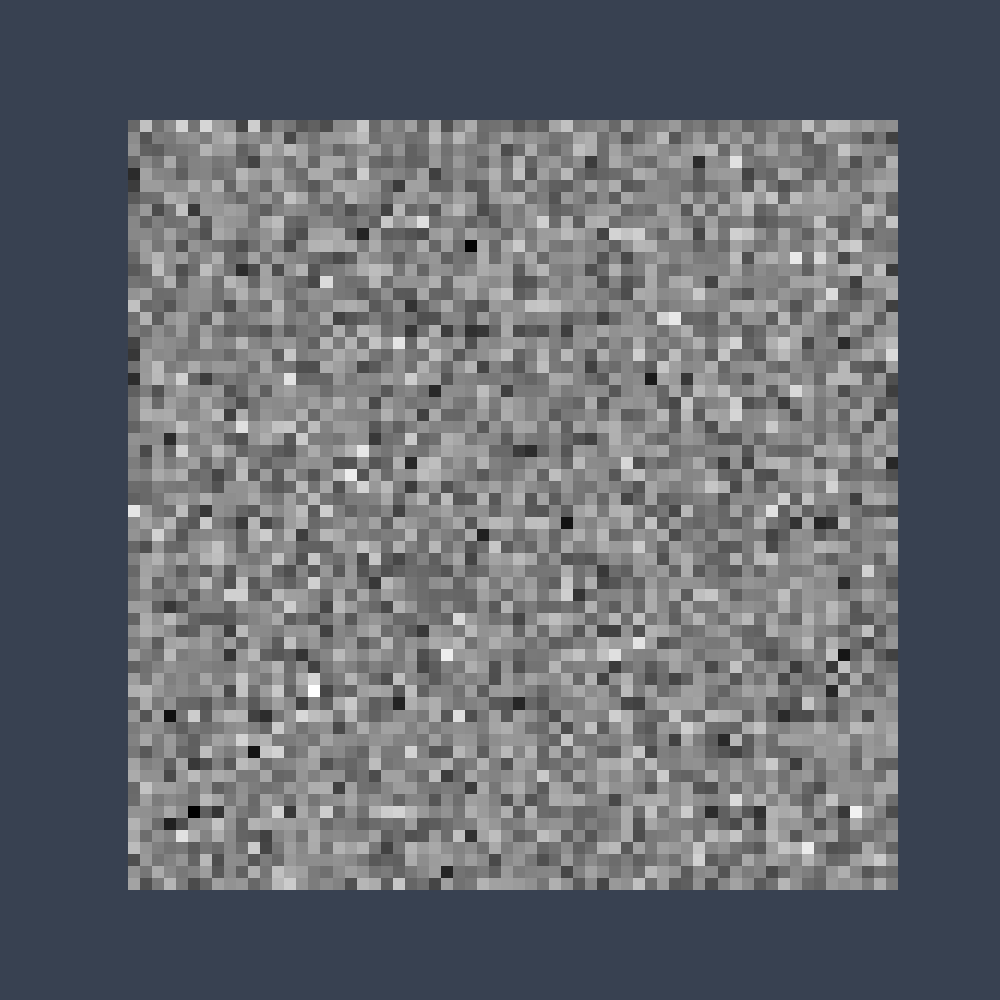

<IPython.core.display.Javascript object>


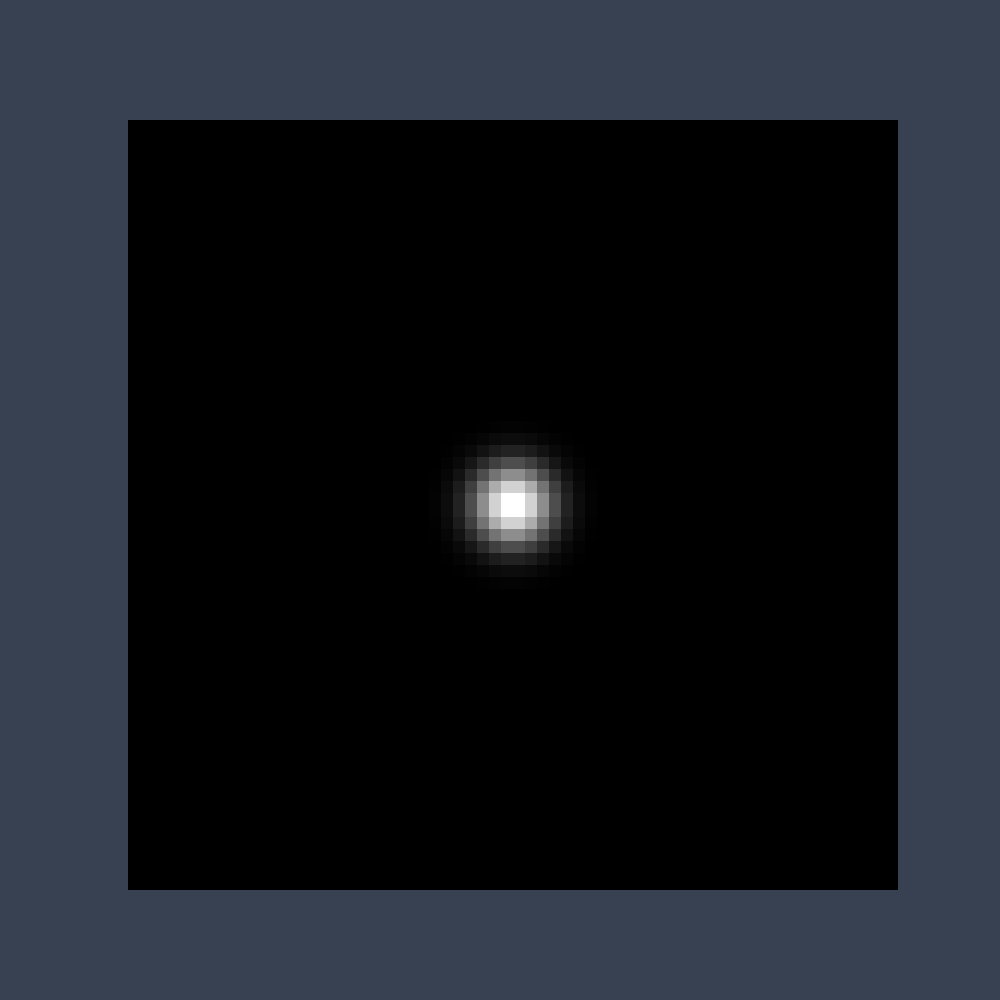

<IPython.core.display.Javascript object>


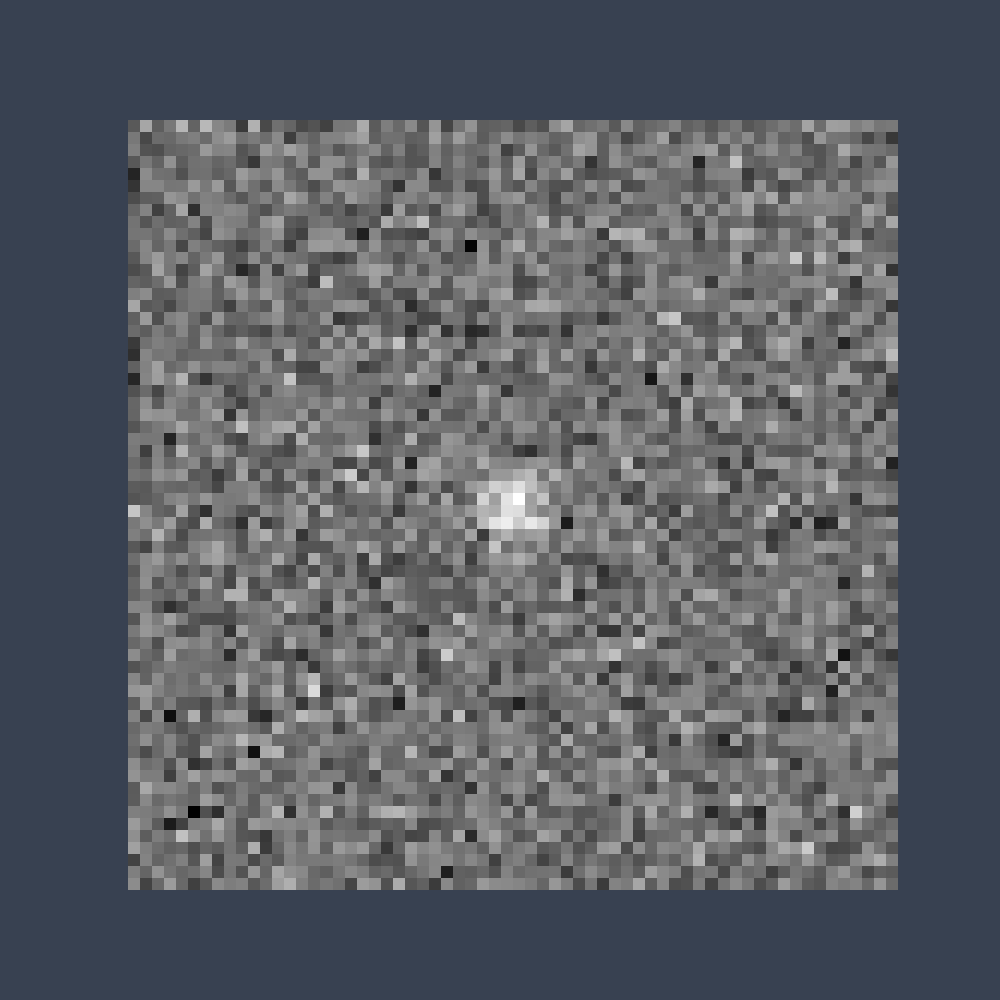

In [1]:
%matplotlib notebook

from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

# Set plot theme
jtplot.style()

# Settings
mean_noise = 100 # set mean noise
signal_intensity = 100 # set signal intensity
gaussian_sigma = 2 # set sd of gaussian kernel
num_images = 200 # number of images to create

# Create list to store noise images
noise = []

# Create noise images
for n in range(num_images):
    # Create measurement noise
    noise.append(np.random.normal(mean_noise,mean_noise**(0.5),(64,64))/255)

# Create signal image
signal = np.zeros((64,64))
signal[30:34,31:33] = signal_intensity/255
signal[31:33,30:34] = signal_intensity/255

# Apply Gaussian kernel to signal image
signal = snd.filters.gaussian_filter(signal,gaussian_sigma)

# Combine signal + noise
noise_signal = [signal+nse for nse in noise]

# Display Images (from 1st sample)

# noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(noise[0],cmap='gray')

# signal image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal,cmap='gray')
plt.show()

# signal + noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(noise_signal[0],cmap='gray')

# plot images
plt.show()

<IPython.core.display.Javascript object>


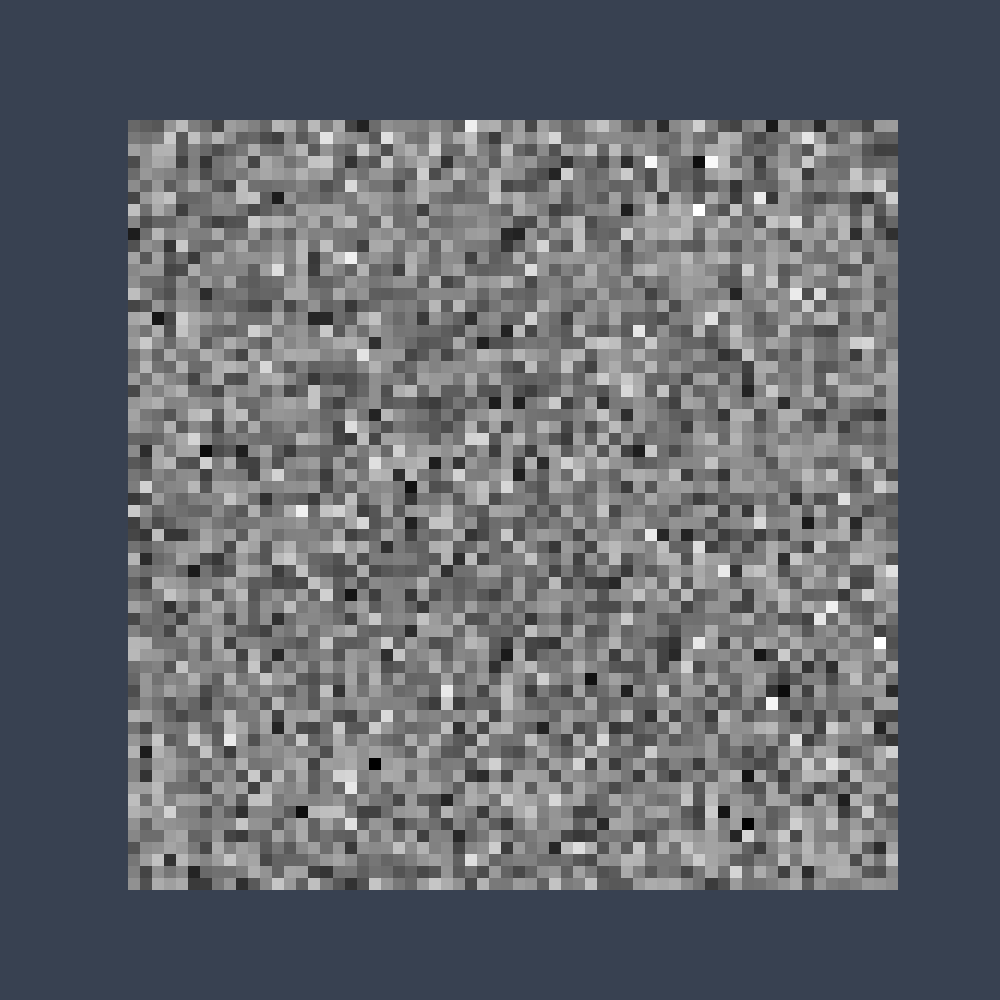

<IPython.core.display.Javascript object>


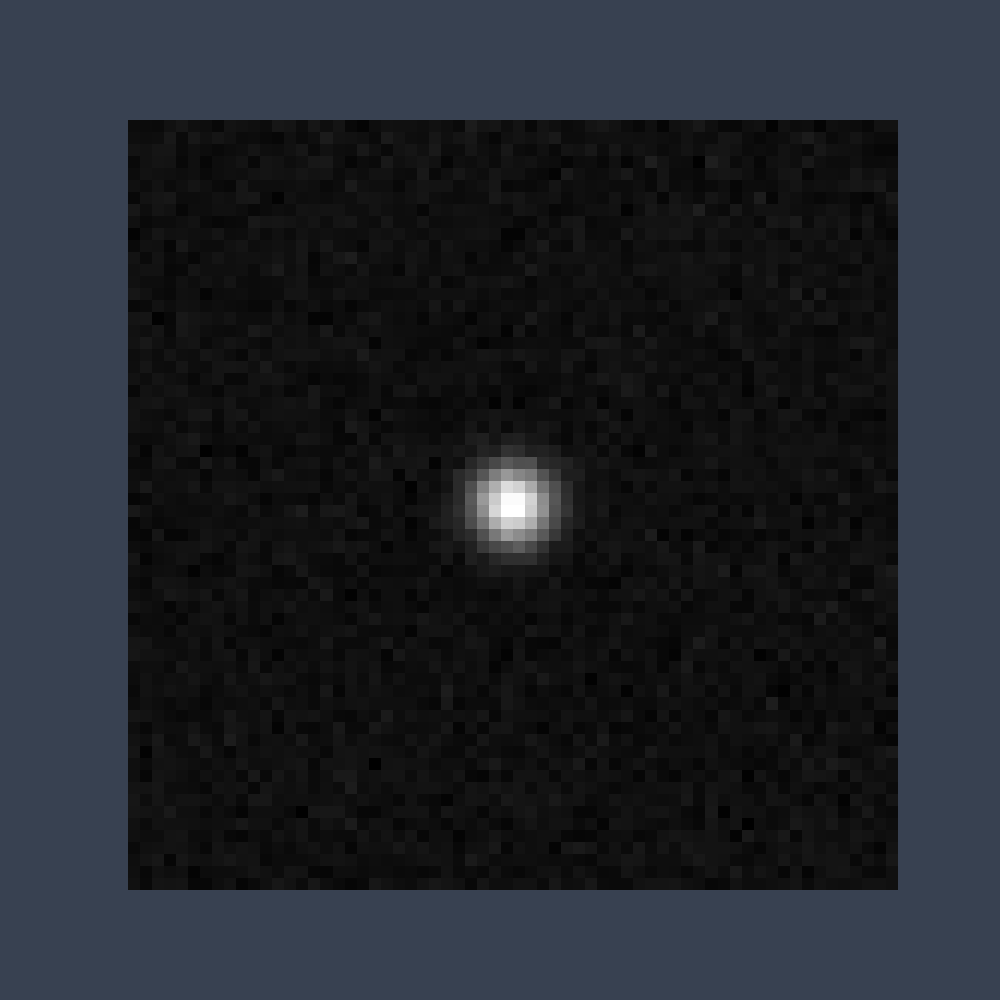

In [2]:
from functools import reduce

# Generate average images for signal+noise and noise
avg_noise = reduce(lambda x,y:x+y, noise)/num_images
avg_noise_signal = reduce(lambda x,y:x+y, noise_signal)/num_images

# avg noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_noise,cmap='gray')

# avg signal + noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_noise_signal,cmap='gray')

# plot images
plt.show()

# flatten
avg_noise_array = avg_noise.flatten()
avg_noise_signal_array = avg_noise_signal.flatten()

In [13]:
# prepare arrays to calculate to covariance
noise_array = np.vstack([n.flatten() for n in noise])
noise_signal_array = np.vstack([n.flatten() for n in noise_signal])
data_array = np.transpose(np.vstack((noise_array,noise_signal_array)))

# calculate covariance
covariance = np.cov(data_array)

# calculate diffence of avg 2 classes
avg_t = np.transpose(avg_noise_signal_array-avg_noise_array)

# calculate test statistic
print(data_array.shape)
print(np.linalg.inv(covariance).shape)
print(avg_t.shape)
l_pw = np.matmul(np.matmul(avg_t,np.linalg.inv(covariance)),data_array)

(4096, 400)
(4096, 4096)
(4096,)


In [9]:
print(l_pw.shape)
print(l_pw)

(400,)
[-16315.30174351 -16340.67701192 -16343.92073382 -16346.96422728
 -16357.51424654 -16313.6472915  -16325.09771862 -16343.19797516
 -16342.30862624 -16328.67468123 -16323.09041913 -16341.53968905
 -16353.90617686 -16366.65895796 -16351.78072412 -16362.66899405
 -16367.47778753 -16334.81141843 -16346.18924635 -16345.06879862
 -16345.3013835  -16346.78714404 -16370.12950866 -16295.95910558
 -16325.04005845 -16341.35565245 -16370.39147687 -16373.43005375
 -16411.91671626 -16332.3052694  -16358.68965458 -16342.61729713
 -16324.6142368  -16316.81622893 -16324.17818271 -16332.82473443
 -16317.8939676  -16328.78615157 -16343.51244329 -16354.73940559
 -16333.08225935 -16349.79146212 -16317.28128303 -16308.62770688
 -16374.58714351 -16339.79409427 -16330.71340264 -16357.89181196
 -16360.04195055 -16337.66483393 -16306.33667036 -16354.15896674
 -16374.72689555 -16334.57703431 -16292.37457327 -16325.67068964
 -16333.10136502 -16357.16362886 -16327.45471812 -16342.21240297
 -16379.5087409  -